<a href="https://colab.research.google.com/github/thiago2608santana/Analise_Series_Temporais/blob/main/SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from itertools import product
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Definir o tamanho das figuras para todos os plots**

In [2]:
plt.rcParams['figure.figsize'] = [10, 7.5]

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Analise_Series_Temporais_Datasets/jj.csv')

In [4]:
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83],
 <a list of 84 Text major ticklabel objects>)

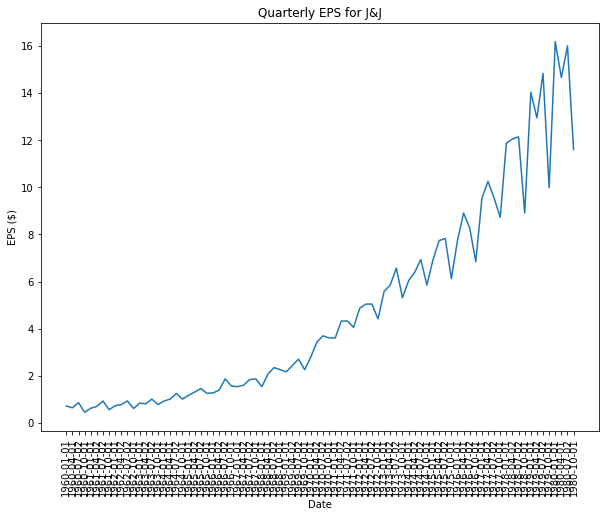

In [5]:
plt.plot(data['date'], data['data'])
plt.title('Quarterly EPS for J&J')
plt.ylabel('EPS ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)

In [6]:
data['data_tr_1'] = np.log(data['data'])
data['data_tr_1'] = data['data_tr_1'].diff()

In [7]:
data.head()

,date,data,data_tr_1
0,1960-01-01,0.71,NaN
1,1960-04-01,0.63,-0.119545
2,1960-07-02,0.85,0.299517
3,1960-10-01,0.44,-0.658462
4,1961-01-01,0.61,0.326684


Text(0.5, 1.0, 'Log difference of Quarterly EPS for J&J')

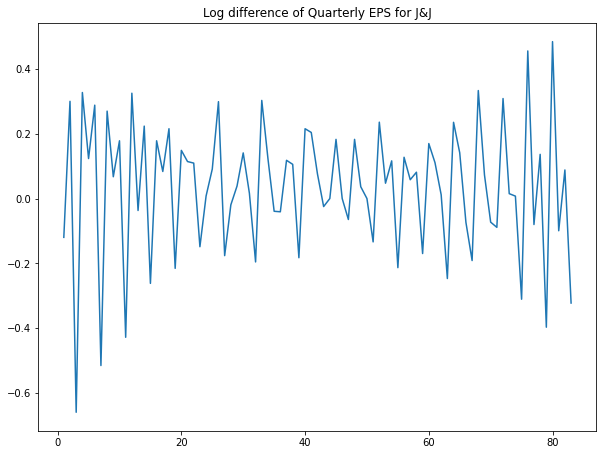

In [10]:
plt.plot(data['data_tr_1'][1:])
plt.title('Log difference of Quarterly EPS for J&J')

In [11]:
data['data_tr_2'] = data['data_tr_1'][1:].diff(4)

In [13]:
data.head(10)

,date,data,data_tr_1,data_tr_2
0,1960-01-01,0.71,NaN,NaN
1,1960-04-01,0.63,-0.119545,NaN
2,1960-07-02,0.85,0.299517,NaN
3,1960-10-01,0.44,-0.658462,NaN
4,1961-01-01,0.61,0.326684,NaN
5,1961-04-02,0.69,0.123233,0.242778
6,1961-07-02,0.92,0.287682,-0.011834
7,1961-10-01,0.55,-0.514455,0.144006
8,1962-01-01,0.72,0.269333,-0.057351
9,1962-04-02,0.77,0.067139,-0.056093


Text(0.5, 1.0, 'Log Difference Quarterly EPS for J&J (Seasonal Difference)')

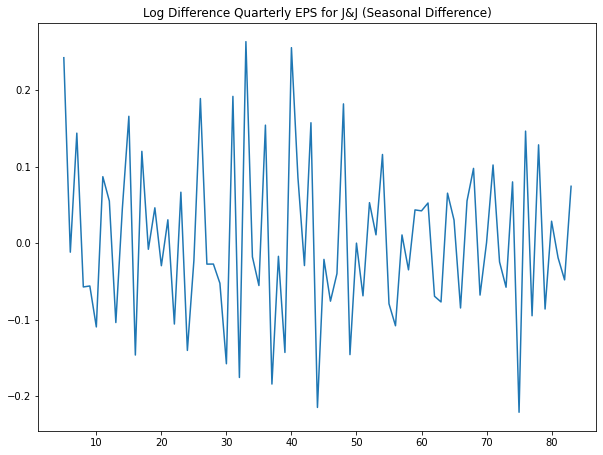

In [15]:
plt.plot(data['data_tr_2'])
plt.title('Log Difference Quarterly EPS for J&J (Seasonal Difference)')

In [16]:
ad_fuller_result = adfuller(data['data_tr_2'][5:])

In [17]:
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'P-value: {ad_fuller_result[1]}')

ADF Statistic: -6.630805109914263
P-value: 5.72157869513621e-09


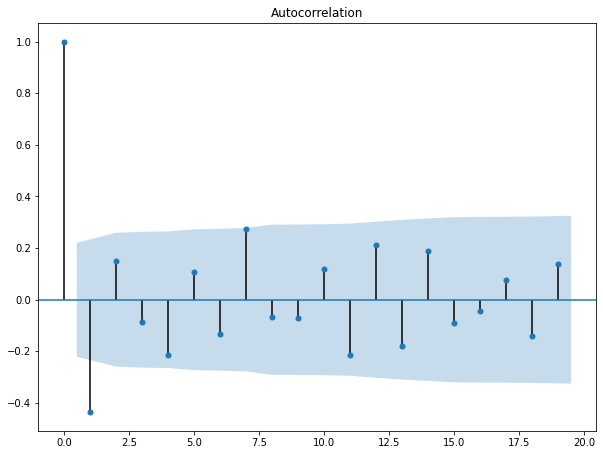

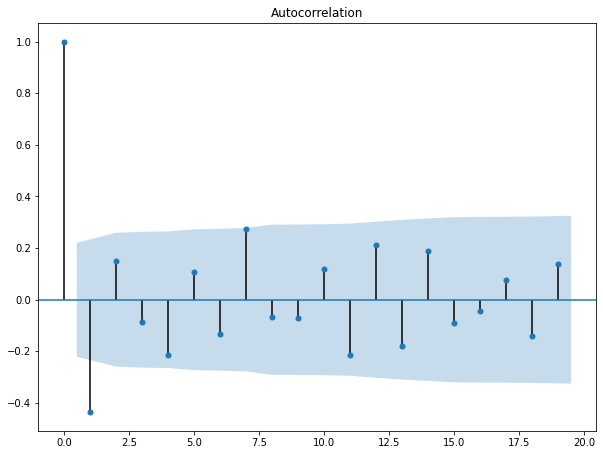

In [18]:
plot_acf(data['data_tr_2'][5:])

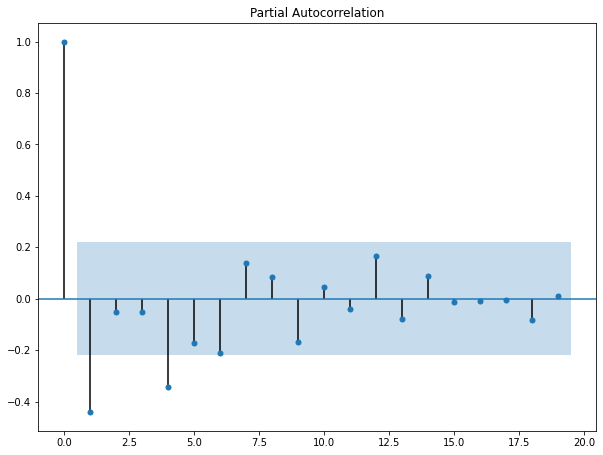

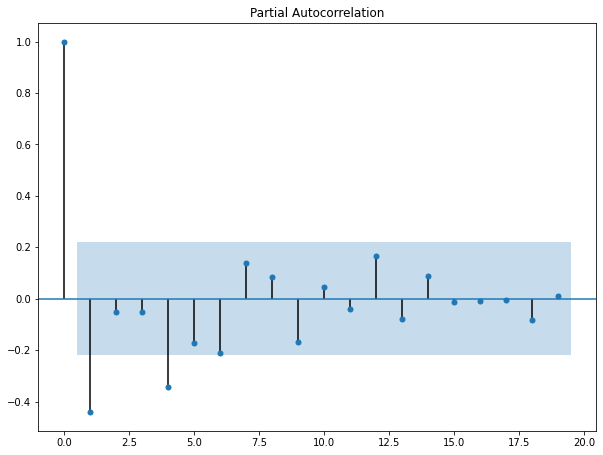

In [19]:
plot_pacf(data['data_tr_2'][5:])